In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import missingno as msno


In [4]:
df = pd.read_csv("Smart_Farming_Crop_Yield_2024.csv")
df.isna().sum()

farm_id                   0
region                    0
crop_type                 0
soil_moisture_%           0
soil_pH                   0
temperature_C             0
rainfall_mm               0
humidity_%                0
sunlight_hours            0
irrigation_type         150
fertilizer_type           0
pesticide_usage_ml        0
sowing_date               0
harvest_date              0
total_days                0
yield_kg_per_hectare      0
sensor_id                 0
timestamp                 0
latitude                  0
longitude                 0
NDVI_index                0
crop_disease_status     130
dtype: int64

<Axes: >

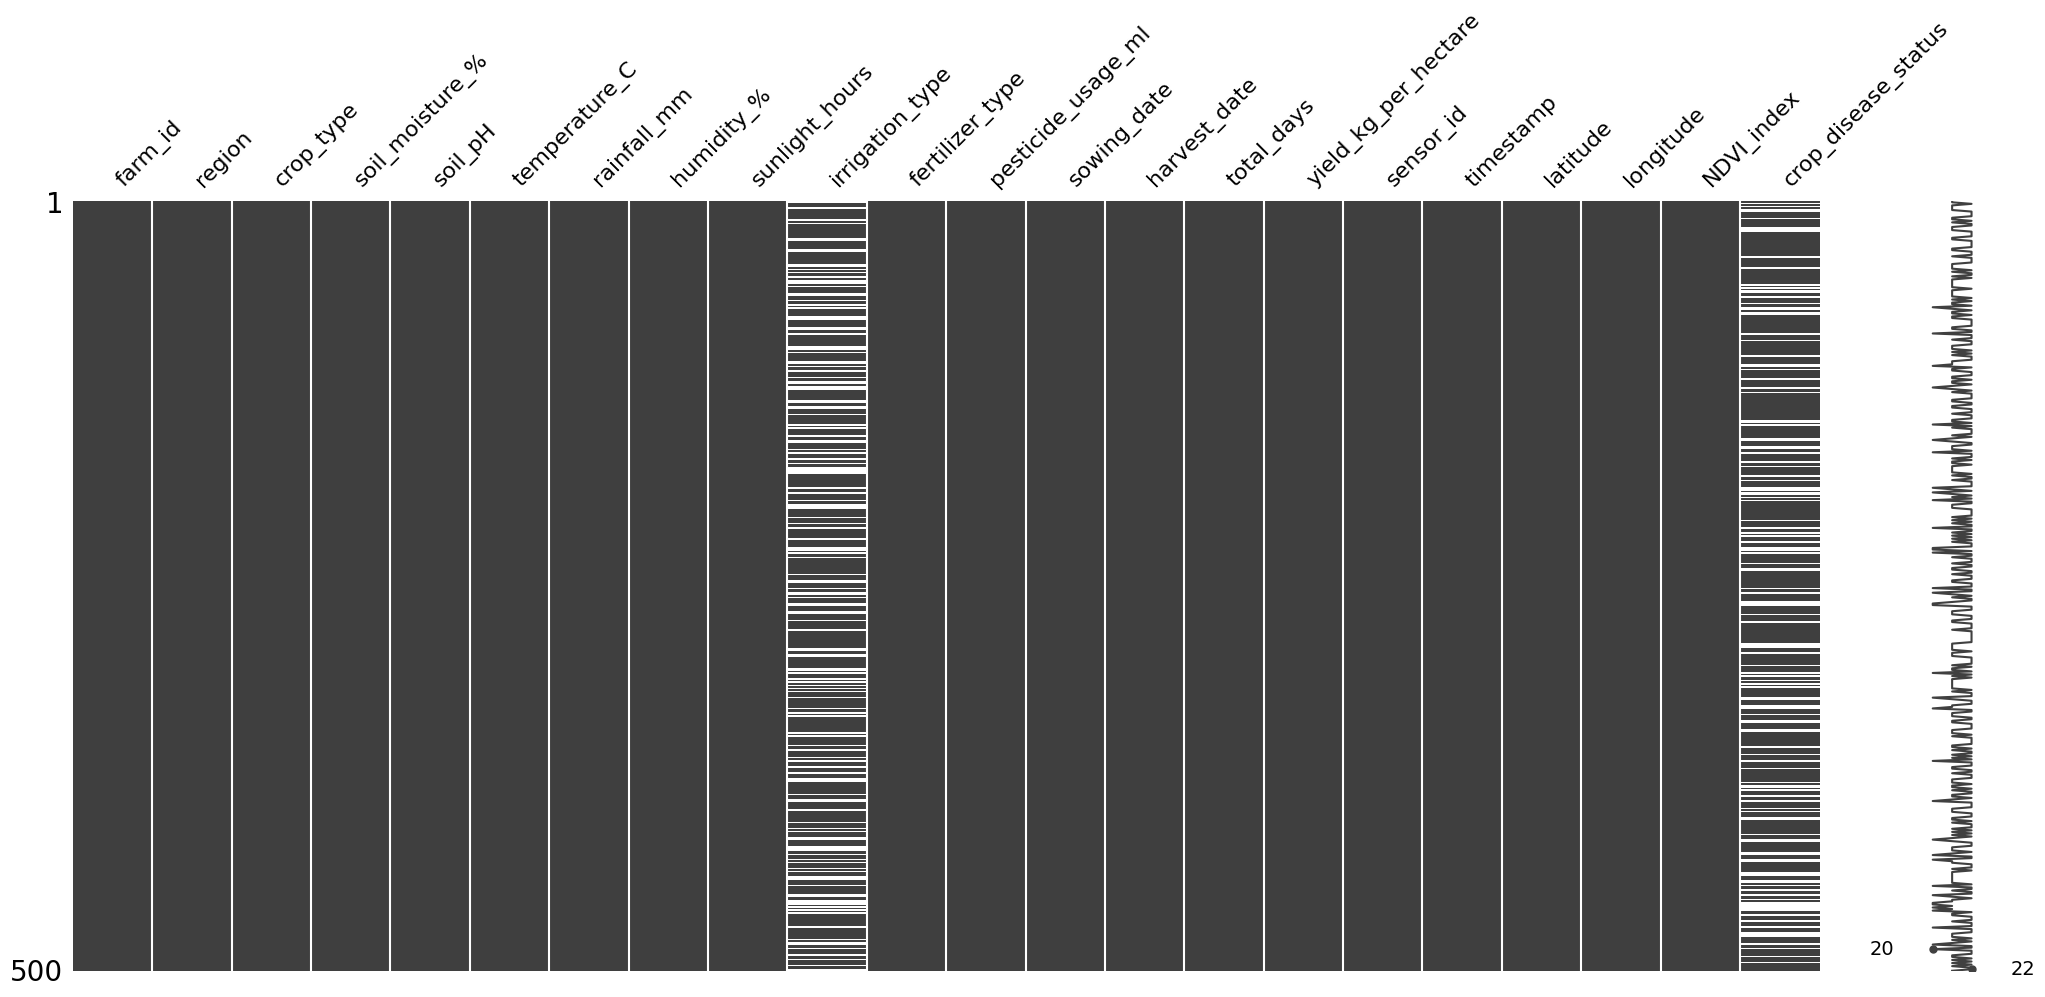

In [5]:
msno.matrix(df)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   farm_id               500 non-null    object 
 1   region                500 non-null    object 
 2   crop_type             500 non-null    object 
 3   soil_moisture_%       500 non-null    float64
 4   soil_pH               500 non-null    float64
 5   temperature_C         500 non-null    float64
 6   rainfall_mm           500 non-null    float64
 7   humidity_%            500 non-null    float64
 8   sunlight_hours        500 non-null    float64
 9   irrigation_type       350 non-null    object 
 10  fertilizer_type       500 non-null    object 
 11  pesticide_usage_ml    500 non-null    float64
 12  sowing_date           500 non-null    object 
 13  harvest_date          500 non-null    object 
 14  total_days            500 non-null    int64  
 15  yield_kg_per_hectare  5

In [7]:
df.describe()

,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,pesticide_usage_ml,total_days,yield_kg_per_hectare,latitude,longitude,NDVI_index
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,26.750140,6.523980,24.675740,181.685740,65.194460,7.03014,26.586980,119.496000,4032.92694,22.442473,80.392248,0.602060
std,10.150053,0.585558,5.348899,72.293091,14.642849,1.69167,13.202429,16.798046,1174.43304,7.283492,5.910664,0.175402
min,10.160000,5.510000,15.000000,50.170000,40.230000,4.01000,5.050000,90.000000,2023.56000,10.004243,70.020021,0.300000
25%,17.890000,6.030000,20.295000,119.217500,51.865000,5.66750,14.945000,105.750000,2994.82000,16.263202,75.374713,0.447500
50%,25.855000,6.530000,24.655000,191.545000,65.685000,6.99500,25.980000,119.000000,4071.69000,21.981743,80.650284,0.610000
75%,36.022500,7.040000,29.090000,239.035000,77.995000,8.47000,38.005000,134.000000,5062.11000,28.528948,85.654629,0.750000
max,44.980000,7.500000,34.840000,298.960000,90.000000,10.00000,49.940000,150.000000,5998.29000,34.981531,89.991901,0.900000


In [8]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.shape

(500, 22)

In [14]:
df.columns

Index(['farm_id', 'region', 'crop_type', 'soil_moisture_%', 'soil_pH',
       'temperature_C', 'rainfall_mm', 'humidity_%', 'sunlight_hours',
       'irrigation_type', 'fertilizer_type', 'pesticide_usage_ml',
       'sowing_date', 'harvest_date', 'total_days', 'yield_kg_per_hectare',
       'sensor_id', 'timestamp', 'latitude', 'longitude', 'NDVI_index',
       'crop_disease_status'],
      dtype='object')

# Visualization

In [15]:
plt.rcParams["figure.figsize"] = (10,6)

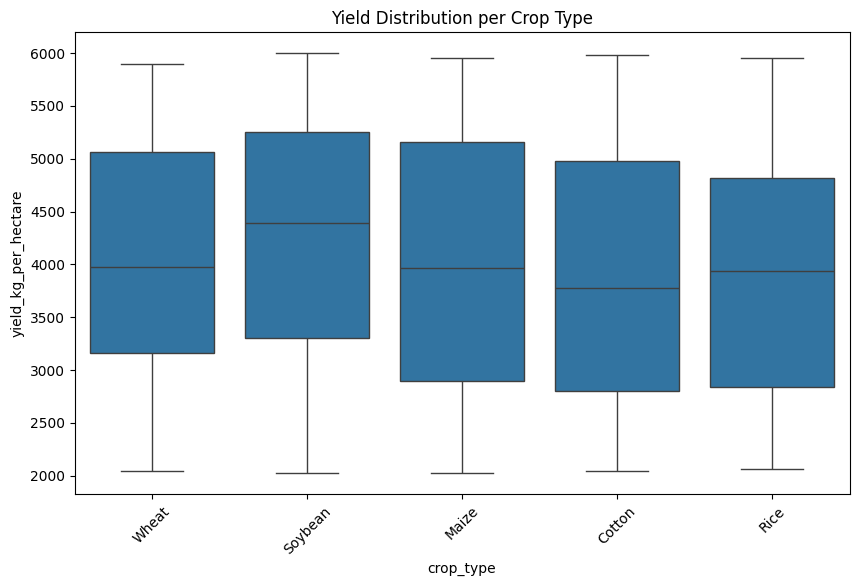

In [20]:
sns.boxplot(data = df, x = 'crop_type', y = 'yield_kg_per_hectare')
plt.xticks(rotation = 45)
plt.title('Yield Distribution per Crop Type')
plt.show()

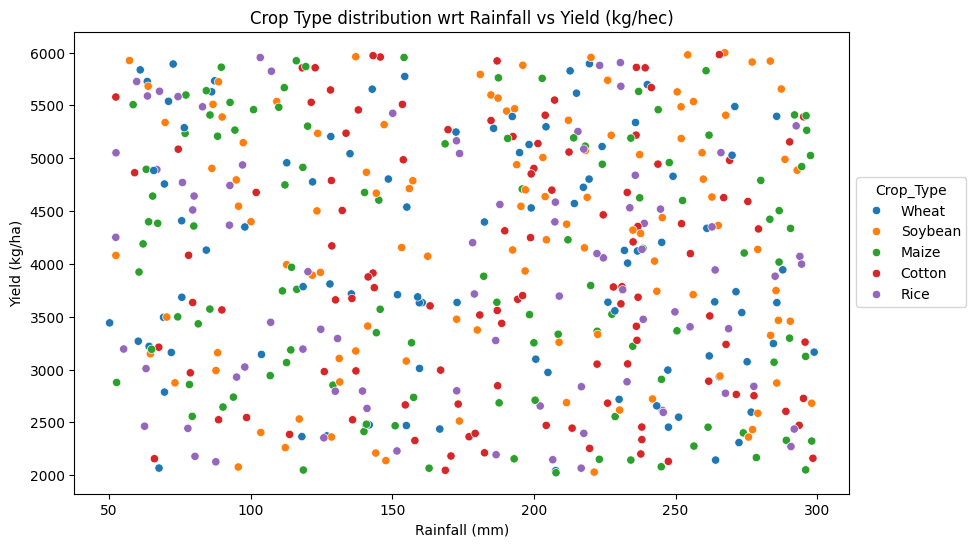

In [43]:
sns.scatterplot(data = df, x = 'rainfall_mm', y = 'yield_kg_per_hectare', hue = 'crop_type')
plt.title("Crop Type distribution wrt Rainfall vs Yield (kg/hec)")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Yield (kg/ha)")
plt.legend(title = "Crop_Type", loc = 'upper right', bbox_to_anchor = (1.16,0.7))
plt.show()

<Axes: >

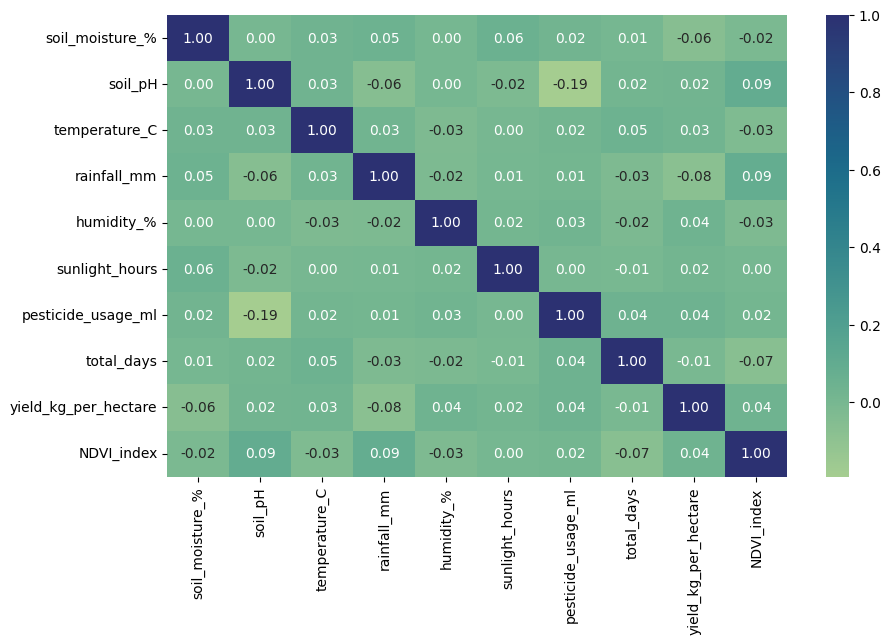

In [47]:
env_features = ['soil_moisture_%', 
                'soil_pH', 
                'temperature_C',
                'rainfall_mm',
                'humidity_%',
                'sunlight_hours',
                'pesticide_usage_ml',
                'total_days',
                'yield_kg_per_hectare',
                'NDVI_index'
]
corr_matrix = df[env_features].corr()
sns.heatmap(data = corr_matrix, annot= True, cmap = 'crest', fmt = '.2f')